In [22]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [26]:
# Load the dataset
data = pd.read_csv("C:/Users/ASUS/Downloads/madfhantr.csv")
data.head()  # Display first few rows to inspect the data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [27]:
# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [29]:
# Fill missing values for categorical columns with mode
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [30]:
# Fill missing values for numerical columns with median
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [31]:
# Encode Categorical Variables
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Dependents', 'Education', 
                                     'Self_Employed', 'Property_Area'], drop_first=True)


In [32]:
# Convert Loan_Status to binary (1 = Eligible, 0 = Not Eligible)
data['Loan_Status'] = data['Loan_Status'].map({'Y': 1, 'N': 0})

In [36]:
# Split Data into Features and Target
X = data.drop(columns=['Loan_ID', 'Loan_Status'])
y = data['Loan_Status']

In [47]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
# Make Predictions
y_pred = dt_classifier.predict(X_test)

In [49]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6747967479674797
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.47      0.50        43
           1       0.73      0.79      0.76        80

    accuracy                           0.67       123
   macro avg       0.64      0.63      0.63       123
weighted avg       0.67      0.67      0.67       123

Confusion Matrix:
 [[20 23]
 [17 63]]


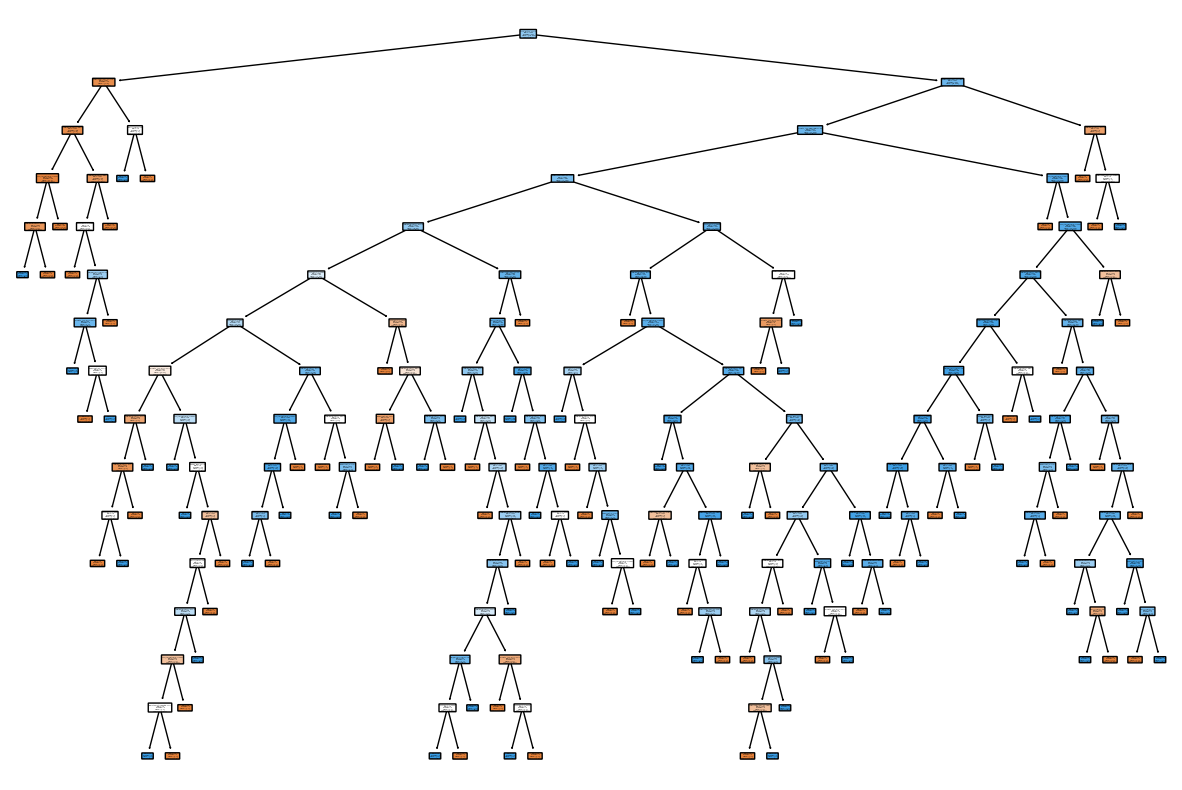

In [50]:

# Optional: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Eligible', 'Eligible'], filled=True, rounded=True)
plt.show()